# **CIA** Time Series <br>

---


#**Group Members**<br>

>Aleena Mariya Sebastian(23122104)<br>

> Falak Ansari(23122106)





In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For plotting graphs
import datetime as dt
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import seaborn as sns

In [22]:
df=pd.read_csv("BAJAJFINSV.csv")
print(df)

            Date      Symbol Series  Prev Close      Open      High       Low  \
0     26-05-2008  BAJAJFINSV     EQ     2101.05    600.00    619.00    501.00   
1     27-05-2008  BAJAJFINSV     EQ      509.10    505.00    610.95    491.10   
2     28-05-2008  BAJAJFINSV     EQ      554.65    564.00    665.60    564.00   
3     29-05-2008  BAJAJFINSV     EQ      640.95    656.65    703.00    608.00   
4     30-05-2008  BAJAJFINSV     EQ      632.40    642.40    668.00    588.30   
...          ...         ...    ...         ...       ...       ...       ...   
3196  26-04-2021  BAJAJFINSV     EQ     9916.65   9992.00  10125.00   9902.20   
3197  27-04-2021  BAJAJFINSV     EQ    10001.75  10000.00  10133.00   9964.70   
3198  28-04-2021  BAJAJFINSV     EQ    10091.35  10200.00  10615.95  10151.15   
3199  29-04-2021  BAJAJFINSV     EQ    10489.30  10540.00  11300.00  10520.00   
3200  30-04-2021  BAJAJFINSV     EQ    11176.55  11000.00  11225.00  10868.70   

          Last     Close   

In [23]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,26-05-2008,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726370e+14,908264,0.2888
1,27-05-2008,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,677627,0.1558
2,28-05-2008,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,774895,0.1689
3,29-05-2008,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982920e+14,1006161,0.2225
4,30-05-2008,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945930e+14,462832,0.1514


In [24]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
3196,26-04-2021,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194160e+14,77816,0.1855
3197,27-04-2021,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441070e+14,77723,0.2267
3198,28-04-2021,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163560e+15,133587,0.1199
3199,29-04-2021,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862820e+15,195324,0.1151
3200,30-04-2021,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257220e+14,129995,0.1556


In [25]:
df.shape

(3201, 14)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Deliverable Volume  3201 non-null   int64  
 13  %Deliverble         3201 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 350.2+ KB


In [27]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [28]:
#check for null values
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [29]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,26-05-2008,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726370e+14,908264,0.2888
1,27-05-2008,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,677627,0.1558
2,28-05-2008,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,774895,0.1689
3,29-05-2008,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982920e+14,1006161,0.2225
4,30-05-2008,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945930e+14,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,26-04-2021,BAJAJFINSV,EQ,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194160e+14,77816,0.1855
3197,27-04-2021,BAJAJFINSV,EQ,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441070e+14,77723,0.2267
3198,28-04-2021,BAJAJFINSV,EQ,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163560e+15,133587,0.1199
3199,29-04-2021,BAJAJFINSV,EQ,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862820e+15,195324,0.1151


Text(0, 0.5, 'VWAP')

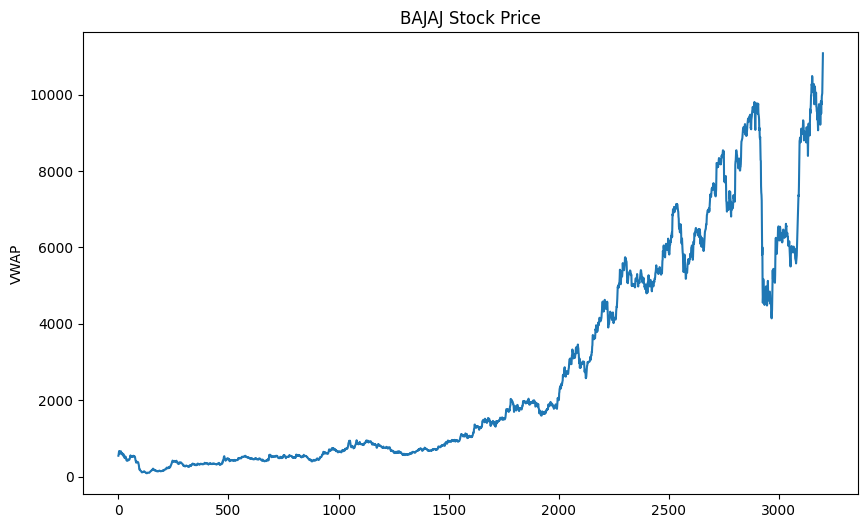

In [32]:
df['VWAP'].plot(figsize=(10,6),title='BAJAJ Stock Price')
plt.ylabel('VWAP')

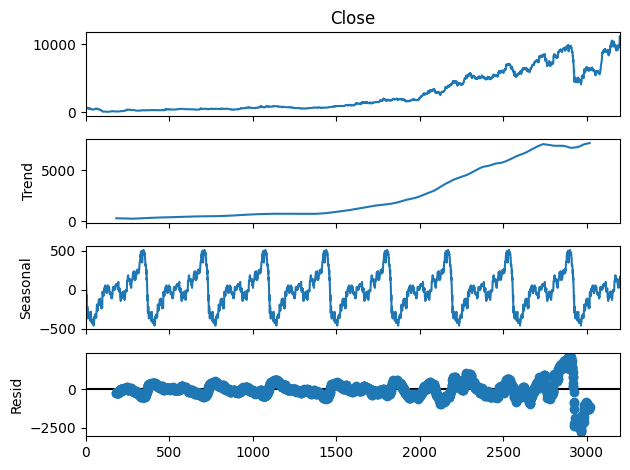

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=365)
result.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
        
# Example (assuming 'Close' column exists)
check_stationarity(df['Close'])

ADF Statistic: 0.565352
p-value: 0.986730
Data is non-stationary


In [17]:
# Seasonal differencing (assuming monthly data)
seasonal_diff = df['Close'] - df['Close'].shift(7)

# Drop NaN values that arise from differencing
seasonal_diff = seasonal_diff.dropna()

# Perform ADF test again on differenced data
result_diff = adfuller(seasonal_diff)

# Output the results of the seasonal differencing
print('ADF Statistic (seasonally differenced):', result_diff[0])
print('p-value (seasonally differenced):', result_diff[1])
check_stationarity(seasonal_diff)

ADF Statistic (seasonally differenced): -7.73217559865935
p-value (seasonally differenced): 1.1178342376683767e-11
ADF Statistic: -7.732176
p-value: 0.000000
Data is stationary
